<a href="https://colab.research.google.com/github/Davidportlouis/cifar_10_classifier/blob/master/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torchvision import transforms,datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import torch.nn.functional as F
from helper import plot_batch,train,test,predict

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.5,0.5,0.5),
                       std=(0.5,0.5,0.5))
])

train_images = datasets.CIFAR10("./",train=True,transform=transform,download=True)
test_images = datasets.CIFAR10("./",train=False,transform=transform,download=True)

train_len = len(train_images)
idx = list(range(train_len))
np.random.shuffle(idx)
split = int(np.floor(0.2 * train_len))
valid_idx,train_idx = idx[:split],idx[split:]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_images,batch_size=20,sampler=train_sampler)
valid_loader = DataLoader(train_images,batch_size=20,sampler=valid_sampler)
test_loader = DataLoader(test_images,batch_size=20,shuffle=True)

classes = train_images.classes

Files already downloaded and verified
Files already downloaded and verified


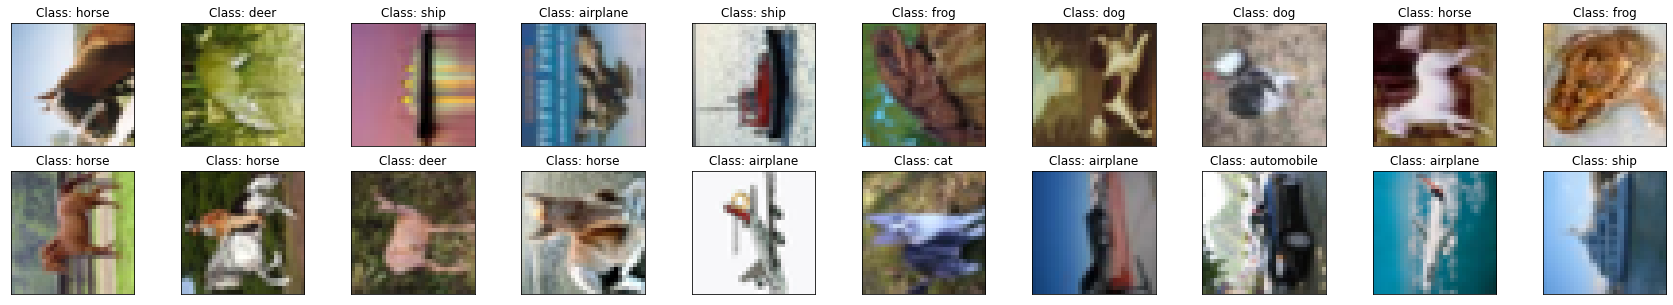

In [4]:
train_images,train_labels = next(iter(train_loader))
plot_batch(train_images,classes,train_labels,normalize=True)

In [38]:
class CifarNet(nn.Module):

  def __init__(self,conv_dim=16):
    super(CifarNet,self).__init__()
    # defining layers
    self.conv_1 = nn.Conv2d(3,conv_dim,3,padding=1)
    self.bnorm_1 = nn.BatchNorm2d(conv_dim)
    self.conv_2 = nn.Conv2d(conv_dim,conv_dim*2,3,padding=1)
    self.bnorm_2 = nn.BatchNorm2d(conv_dim*2)
    self.conv_3 = nn.Conv2d(conv_dim*2,conv_dim*4,3,padding=1)
    self.bnorm_3 = nn.BatchNorm2d(conv_dim*4)
    self.conv_4 = nn.Conv2d(conv_dim*4,conv_dim*8,3,padding=1)
    self.bnorm_4 = nn.BatchNorm2d(conv_dim*8)
    self.maxpool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(2*2*conv_dim*8,510)
    self.fc2 = nn.Linear(510,10)
    self.drop = nn.Dropout(p=0.2)

  def forward(self,x):
    x = self.conv_1(x)
    x = F.relu(self.bnorm_1(x))
    x = self.maxpool(x)
    x = self.conv_2(x)
    x = F.relu(self.bnorm_2(x))
    x = self.maxpool(x)
    x = self.conv_3(x)
    x = F.relu(self.bnorm_3(x))
    x = self.maxpool(x)
    x = self.conv_4(x)
    x = F.relu(self.bnorm_4(x))
    x = self.maxpool(x)
    x = x.view(x.shape[0],-1)
    x = self.drop(x)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.log_softmax(self.fc2(x),dim=1)
    return x

model = CifarNet()
model = model.to(device)
print(model)

CifarNet(
  (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=510, bias=True)
  (fc2): Linear(in_features=510, out_features=10, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)


In [39]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
train_loss,valid_loss = train(model,train_loader,valid_loader,optimizer,criterion,50,device)

epoch: 1/50 trainloss: 1.95775 validloss: 1.58248 time: 18.818 sec
Loss decresed: inf -> 1.58248
epoch: 2/50 trainloss: 1.58243 validloss: 1.41517 time: 18.771 sec
Loss decresed: 1.58248 -> 1.41517
epoch: 3/50 trainloss: 1.39046 validloss: 1.21629 time: 18.736 sec
Loss decresed: 1.41517 -> 1.21629
epoch: 4/50 trainloss: 1.27080 validloss: 1.07315 time: 18.907 sec
Loss decresed: 1.21629 -> 1.07315
epoch: 5/50 trainloss: 1.17846 validloss: 1.02780 time: 19.179 sec
Loss decresed: 1.07315 -> 1.02780
epoch: 6/50 trainloss: 1.12511 validloss: 0.97497 time: 18.663 sec
Loss decresed: 1.02780 -> 0.97497
epoch: 7/50 trainloss: 1.07517 validloss: 0.98355 time: 18.616 sec
epoch: 8/50 trainloss: 1.02416 validloss: 0.94953 time: 18.508 sec
Loss decresed: 0.97497 -> 0.94953
epoch: 9/50 trainloss: 0.99670 validloss: 0.90249 time: 18.675 sec
Loss decresed: 0.94953 -> 0.90249
epoch: 10/50 trainloss: 0.97040 validloss: 0.94276 time: 18.466 sec
epoch: 11/50 trainloss: 0.93820 validloss: 0.90853 time: 18.5

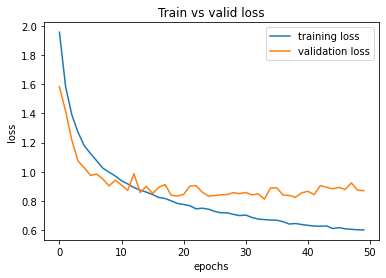

In [40]:
 plt.plot(train_loss,label="training loss")
plt.plot(valid_loss,label="validation loss")
plt.title("Train vs valid loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [41]:
state_dict = torch.load("model_weights.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [42]:
test(model,test_loader,optimizer,criterion,device)

testloss: 0.850294 accuracy: 0.729


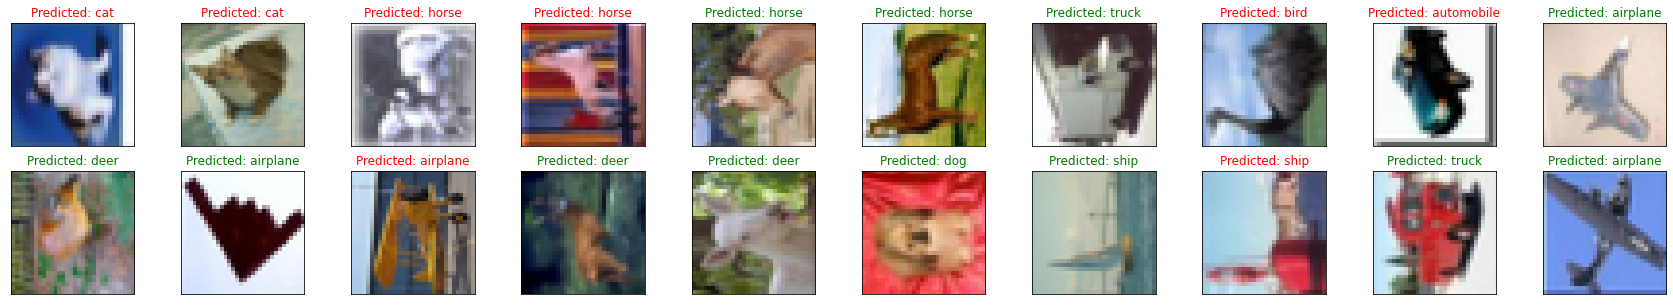

In [44]:
test_images,test_labels = next(iter(test_loader))
predict(test_images,classes,test_labels,model,device)